## **Importation des bibliothèques nécessaires**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
import numpy as np

## **Importation du DataSet**

In [2]:
excel_file_path = '../BlessuresTennis_Causes.xlsx'
df = pd.read_excel(excel_file_path)
df.head()

ID                     CategBlessure                     TypeBlessure  \
0   1  Blessures aux membres supérieurs  Douleur à la main et au poignet   
1   2  Blessures aux membres supérieurs  Douleur à la main et au poignet   
2   3  Blessures aux membres supérieurs  Douleur à la main et au poignet   
3   4  Blessures aux membres supérieurs  Douleur à la main et au poignet   
4   5  Blessures aux membres supérieurs  Douleur à la main et au poignet   

                                            Blessure  \
0                          ténosynovite de Quervain    
1      ténosynovite de l’extenseur ulnaire du carpe    
2                       entorse du ligament carpien    
3  fractures de fatigue (scaphoïde; os crochu ou ...   
4             lésions du ligament annulaire du carpe   

                                 Symptomes_Blessures  \
0  Inflammation douloureuse des tendons près du p...   
1  Inflammation douloureuse des tendons près du c...   
2  Blessure traumatique au ligament du poignet; c...   
3  Fissures dans les os du poignet ou des doigts ...   
4  Blessures au ligament du poignet; causant doul...   

                                Traitement_Blessures  \
0  infiltrations locales de cortisone; réeduction...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                             Prescriptions_Blessures  \
0  Orthèse poignet-pouce tendinite NUIT; Orthèse ...   
1  Orthèse poignet canal carpien JOUR; Orthèse po...   
2  Orthèse poignet canal carpien JOUR; Orthèse po...   
3                                                NaN   
4  Orthèse poignet canal carpien JOUR; Orthèse po...   

  Prix_Prescriptions (en € )  \
0     55,31 ; 25,99 ; 81,30    
1     23,99 ; 43,30 ; 67,29    
2     23,99 ; 43,30 ; 67,29    
3                        NaN   
4     23,99 ; 43,30 ; 67,29    

                                Images_Prescriptions  \
0  https://epitact.twic.pics/prod/2024-02/mea-que...   
1  https://epitact.twic.pics/prod/2024-02/mea-car...   
2  https://epitact.twic.pics/prod/2024-02/mea-car...   
3                                                NaN   
4  https://epitact.twic.pics/prod/2024-02/mea-car...   

                           Descriptifs_Prescriptions  \
0  Soulage les douleurs liées à la tendinite De Q...   
1  Soulage les douleurs liées au syndrome du cana...   
2  Soulage les douleurs liées au syndrome du cana...   
3                                                NaN   
4  Soulage les douleurs liées au syndrome du cana...   

                             LienAchat_Prescriptions  \
0  https://epitact.fr/quervimmo-orthese-immobilis...   
1  https://epitact.fr/carp-activ?list=Article%20T...   
2  https://epitact.fr/carp-activ?list=Article%20T...   
3                                                NaN   
4  https://epitact.fr/carp-activ?list=Article%20T...   

                                     Causes_Blessure  \
0  Utilisation excessive du poignet et du pouce; ...   
1  Surutilisation du poignet; Mauvaise posture; M...   
2  Torsion excessive du poignet; Chute/Impact direct   
3       Stress répété; Impact direct; Surutilisation   
4       Utilisation excessive; Mouvements répétitifs   

                                   Zone_Blessures  \
0                              Zone de transition   
1       Zone médiane gauche; Zone médiane droite    
2  Coins inférieur gauche; Coins supérieur gauche   
3                           Zone de service déuce   
4  Coins inférieur gauche; Coins supérieur gauche   

                                    Description_Zone  
0  La zone intermédiaire entre le fond de court e...  
1  Les zones près du centre du terrain où les jou...  
2  Les coins du fond de court près du filet où le...  
3  La zone près du filet du côté déuce où les jou...  
4  Les coins du fond de court près du filet où le...

## **1. Pré-Traitement & Nettoyages des données:**

### **Correction des séparateurs de données**

In [3]:
def fix_separators(df):
    corrections = {}
    for column in df.columns:
        corrections[column] = []
        for i, value in enumerate(df[column]):
            if pd.notnull(value) and '; ' in str(value):
                parts = str(value).split('; ')
                if len(parts) > 1:
                    df.at[i, column] = '; '.join(part.strip() for part in parts)
                    corrections[column].append(f"Ligne {i+1}: Séparateur corrigé")
            elif pd.notnull(value) and ';' in str(value):
                df.at[i, column] = '; '.join(part.strip() for part in str(value).split(';') if part.strip() != '')
                corrections[column].append(f"Ligne {i+1}: Séparateur corrigé")
    return df, corrections

df, corrections = fix_separators(df[['ID', 'CategBlessure', 'TypeBlessure', 'Blessure', 'Symptomes_Blessures', 'Traitement_Blessures', 'Prescriptions_Blessures', 'Prix_Prescriptions (en € )', 'Images_Prescriptions', 'Descriptifs_Prescriptions', 'LienAchat_Prescriptions', 'Causes_Blessure', 'Zone_Blessures', 'Description_Zone']])
print("Séparateurs corrigés :")
for column, correction in corrections.items():
    if correction:
        print(f"Colonne {column}:")
        for item in correction:
            print(f"- {item}")
        print('\n')
df.head()

Séparateurs corrigés :
Colonne Blessure:
- Ligne 4: Séparateur corrigé
- Ligne 21: Séparateur corrigé
- Ligne 22: Séparateur corrigé


Colonne Symptomes_Blessures:
- Ligne 1: Séparateur corrigé
- Ligne 2: Séparateur corrigé
- Ligne 3: Séparateur corrigé
- Ligne 4: Séparateur corrigé
- Ligne 5: Séparateur corrigé
- Ligne 7: Séparateur corrigé
- Ligne 8: Séparateur corrigé
- Ligne 9: Séparateur corrigé
- Ligne 10: Séparateur corrigé
- Ligne 15: Séparateur corrigé
- Ligne 21: Séparateur corrigé
- Ligne 22: Séparateur corrigé
- Ligne 24: Séparateur corrigé
- Ligne 31: Séparateur corrigé
- Ligne 32: Séparateur corrigé
- Ligne 34: Séparateur corrigé
- Ligne 38: Séparateur corrigé


Colonne Traitement_Blessures:
- Ligne 1: Séparateur corrigé
- Ligne 6: Séparateur corrigé
- Ligne 12: Séparateur corrigé
- Ligne 18: Séparateur corrigé
- Ligne 20: Séparateur corrigé
- Ligne 24: Séparateur corrigé
- Ligne 25: Séparateur corrigé
- Ligne 26: Séparateur corrigé
- Ligne 29: Séparateur corrigé
- Ligne 

ID                     CategBlessure                     TypeBlessure  \
0   1  Blessures aux membres supérieurs  Douleur à la main et au poignet   
1   2  Blessures aux membres supérieurs  Douleur à la main et au poignet   
2   3  Blessures aux membres supérieurs  Douleur à la main et au poignet   
3   4  Blessures aux membres supérieurs  Douleur à la main et au poignet   
4   5  Blessures aux membres supérieurs  Douleur à la main et au poignet   

                                            Blessure  \
0                          ténosynovite de Quervain    
1      ténosynovite de l’extenseur ulnaire du carpe    
2                       entorse du ligament carpien    
3  fractures de fatigue (scaphoïde; os crochu ou ...   
4             lésions du ligament annulaire du carpe   

                                 Symptomes_Blessures  \
0  Inflammation douloureuse des tendons près du p...   
1  Inflammation douloureuse des tendons près du c...   
2  Blessure traumatique au ligament du poignet; c...   
3  Fissures dans les os du poignet ou des doigts ...   
4  Blessures au ligament du poignet; causant doul...   

                                Traitement_Blessures  \
0  infiltrations locales de cortisone; réeduction...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                             Prescriptions_Blessures  \
0  Orthèse poignet-pouce tendinite NUIT; Orthèse ...   
1  Orthèse poignet canal carpien JOUR; Orthèse po...   
2  Orthèse poignet canal carpien JOUR; Orthèse po...   
3                                                NaN   
4  Orthèse poignet canal carpien JOUR; Orthèse po...   

  Prix_Prescriptions (en € )  \
0        55,31; 25,99; 81,30   
1        23,99; 43,30; 67,29   
2        23,99; 43,30; 67,29   
3                        NaN   
4        23,99; 43,30; 67,29   

                                Images_Prescriptions  \
0  https://epitact.twic.pics/prod/2024-02/mea-que...   
1  https://epitact.twic.pics/prod/2024-02/mea-car...   
2  https://epitact.twic.pics/prod/2024-02/mea-car...   
3                                                NaN   
4  https://epitact.twic.pics/prod/2024-02/mea-car...   

                           Descriptifs_Prescriptions  \
0  Soulage les douleurs liées à la tendinite De Q...   
1  Soulage les douleurs liées au syndrome du cana...   
2  Soulage les douleurs liées au syndrome du cana...   
3                                                NaN   
4  Soulage les douleurs liées au syndrome du cana...   

                             LienAchat_Prescriptions  \
0  https://epitact.fr/quervimmo-orthese-immobilis...   
1  https://epitact.fr/carp-activ?list=Article%20T...   
2  https://epitact.fr/carp-activ?list=Article%20T...   
3                                                NaN   
4  https://epitact.fr/carp-activ?list=Article%20T...   

                                     Causes_Blessure  \
0  Utilisation excessive du poignet et du pouce; ...   
1  Surutilisation du poignet; Mauvaise posture; M...   
2  Torsion excessive du poignet; Chute/Impact direct   
3       Stress répété; Impact direct; Surutilisation   
4       Utilisation excessive; Mouvements répétitifs   

                                   Zone_Blessures  \
0                              Zone de transition   
1        Zone médiane gauche; Zone médiane droite   
2  Coins inférieur gauche; Coins supérieur gauche   
3                           Zone de service déuce   
4  Coins inférieur gauche; Coins supérieur gauche   

                                    Description_Zone  
0  La zone intermédiaire entre le fond de court e...  
1  Les zones près du centre du terrain où les jou...  
2  Les coins du fond de court près du filet où le...  
3  La zone près du filet du côté déuce où les jou...  
4  Les coins du fond de court près du filet où le...

### **Traitement des données sur les prescriptions médicales:**

In [4]:
columns_to_convert = ['Prescriptions_Blessures', 'Prix_Prescriptions (en € )', 'Images_Prescriptions', 'Descriptifs_Prescriptions', 'LienAchat_Prescriptions']
df = df.dropna(subset=columns_to_convert, how='all')

In [5]:
def split_columns(row):
    try:
        prescriptions = row['Prescriptions_Blessures'].split('; ')
        prices = [float(price.replace(',', '.')) for price in row['Prix_Prescriptions (en € )'].split('; ')]
        images = row['Images_Prescriptions'].split('; ')
        descriptions = row['Descriptifs_Prescriptions'].split('; ')
        links = row['LienAchat_Prescriptions'].split('; ')
        return list(zip(prescriptions, prices, images, descriptions, links))
    except AttributeError:
        return [(row['Prescriptions_Blessures'], row['Prix_Prescriptions (en € )'], row['Images_Prescriptions'], row['Descriptifs_Prescriptions'], row['LienAchat_Prescriptions'])]

prescriptions_df = df.apply(split_columns, axis=1).explode().apply(lambda x: pd.Series(x, index=['Prescription', 'Prix', 'Image', 'Descriptif', 'Lien d\'achat']))

print("\nPrescriptions :")
for index, row in prescriptions_df.iterrows():
    print(f"| Prescription : {row['Prescription']} | Prix : {row['Prix']} | Image : {row['Image']} | Descriptif : {row['Descriptif']} | Lien d'achat : {row['Lien d\'achat']} |")



Prescriptions :
| Prescription : Orthèse poignet-pouce tendinite NUIT | Prix : 55.31 | Image : https://epitact.twic.pics/prod/2024-02/mea-querv_immo.jpg?twic=v1/contain=1300x1300/contain-max=1300x1300/output=webp&itok=jw0fmUIn | Descriptif : Soulage les douleurs liées à la tendinite De Quervain la nuit ou au repos | Lien d'achat : https://epitact.fr/quervimmo-orthese-immobilisation-poignet-pouce-tendinite-de-quervain?list=Article%20R%C3%A9cidive%20de%20la%20t%C3%A9nosynovite%20De%20Quervain |
| Prescription : Orthèse poignet-pouce tendinite JOUR | Prix : 25.99 | Image : https://epitact.twic.pics/prod/2024-02/mea-querv_activ.jpg?twic=v1/contain=1300x1300/contain-max=1300x1300/output=webp&itok=SO_Lej5n | Descriptif : Soulage les douleurs liées à la tendinite De Quervain lors des activités quotidiennes | Lien d'achat : https://epitact.fr/quervactiv-orthese-tendinite-de-quervain?list=Article%20R%C3%A9cidive%20de%20la%20t%C3%A9nosynovite%20De%20Quervain |
| Prescription : DUO orthèses tend

#### **Traitement des données listées restantes:**

In [6]:
non_prescriptions_columns = ['Traitement_Blessures', 'Causes_Blessure', 'Zone_Blessures']
non_prescriptions_df = df[non_prescriptions_columns].reset_index().rename(columns={'index': 'Blessure'})
for col in non_prescriptions_columns:
    non_prescriptions_df[col] = non_prescriptions_df[col].str.split('; ')
non_prescriptions_df = non_prescriptions_df.explode('Traitement_Blessures').explode('Causes_Blessure').explode('Zone_Blessures')

print("\nDonnées pour le traitement, les causes et la zone des blessures :")
print(non_prescriptions_df)


Données pour le traitement, les causes et la zone des blessures :
    Blessure                Traitement_Blessures  \
0          0  infiltrations locales de cortisone   
0          0  infiltrations locales de cortisone   
0          0  infiltrations locales de cortisone   
0          0           réeduction de la pratique   
0          0           réeduction de la pratique   
..       ...                                 ...   
15        32                                 NaN   
16        33                                 NaN   
16        33                                 NaN   
16        33                                 NaN   
16        33                                 NaN   

                                 Causes_Blessure         Zone_Blessures  
0   Utilisation excessive du poignet et du pouce     Zone de transition  
0                          Mouvements répétitifs     Zone de transition  
0                   Mauvaise technique de frappe     Zone de transition  
0   Utilisat

## **2. Exploration des données**

### **Répartition des catégories de blessures**

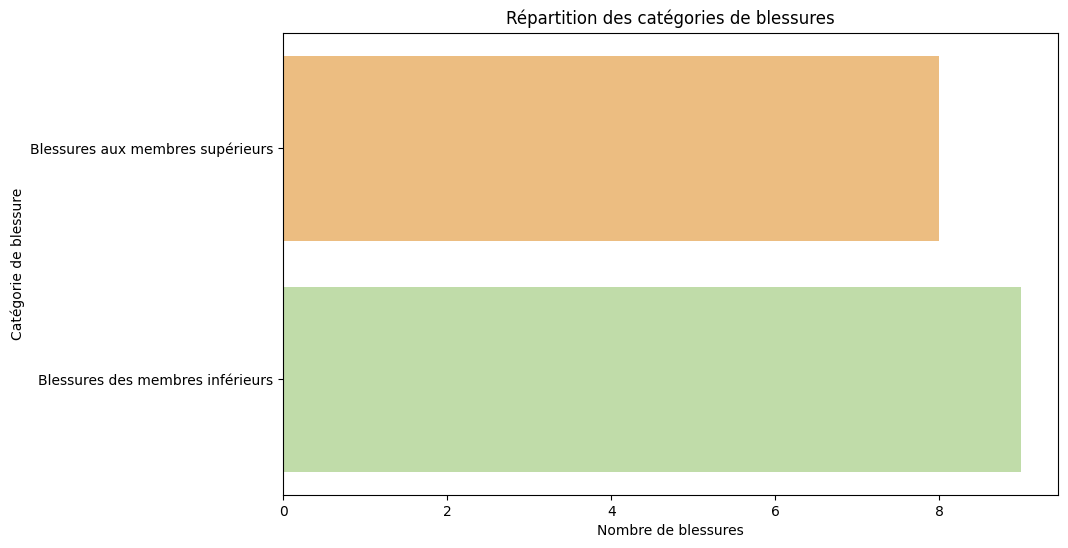

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(y='CategBlessure', data=df, hue='CategBlessure', palette="Spectral", dodge=False, legend=False)
plt.title('Répartition des catégories de blessures')
plt.xlabel('Nombre de blessures')
plt.ylabel('Catégorie de blessure')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


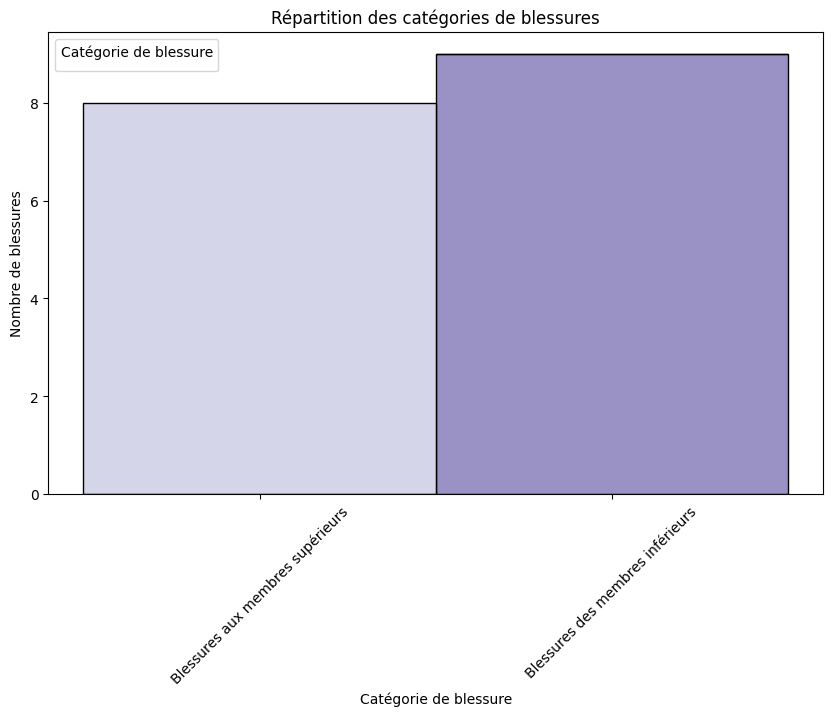

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CategBlessure', hue='CategBlessure', multiple='stack', palette='Purples')
plt.title('Répartition des catégories de blessures')
plt.xlabel('Catégorie de blessure')
plt.ylabel('Nombre de blessures')
plt.xticks(rotation=45)
plt.legend(title='Catégorie de blessure')
plt.show()

### **Répartition des types de blessures**


C:\Users\konan\AppData\Local\Temp\ipykernel_9656\3011538346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='TypeBlessure', data=df, palette="husl", order=df['TypeBlessure'].value_counts().index)


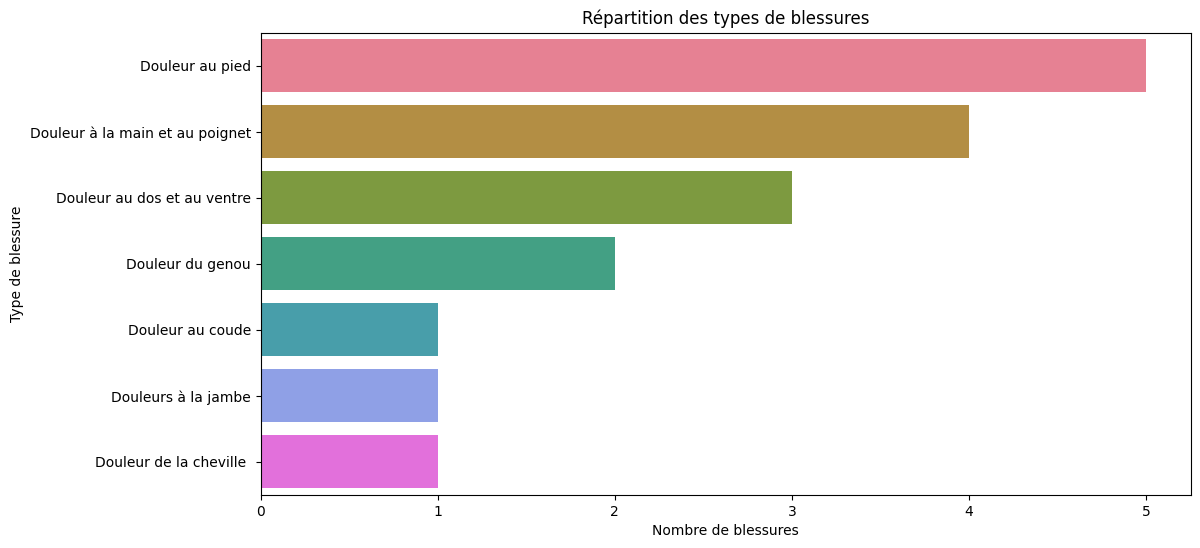

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='TypeBlessure', data=df, palette="husl", order=df['TypeBlessure'].value_counts().index)
plt.title('Répartition des types de blessures')
plt.xlabel('Nombre de blessures')
plt.ylabel('Type de blessure')
plt.show()

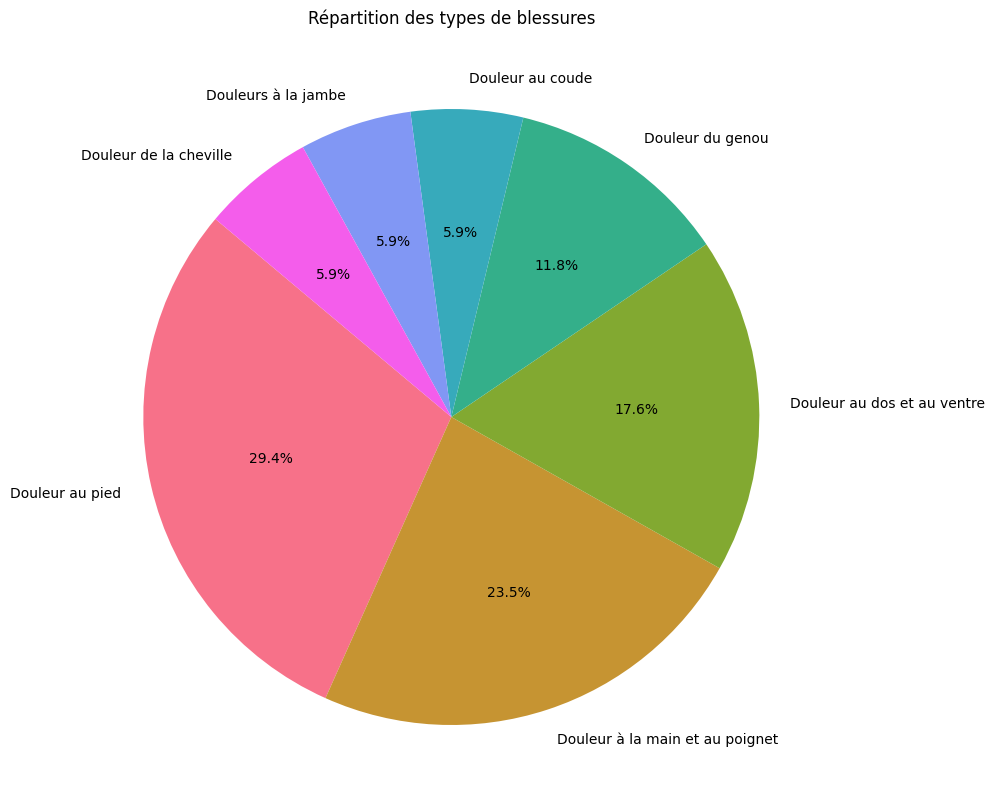

In [10]:
plt.figure(figsize=(10, 10))
df['TypeBlessure'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(df['TypeBlessure'].unique())))
plt.title('Répartition des types de blessures')
plt.ylabel('')
plt.show()

### **Fréquence de recommandations par prescription**

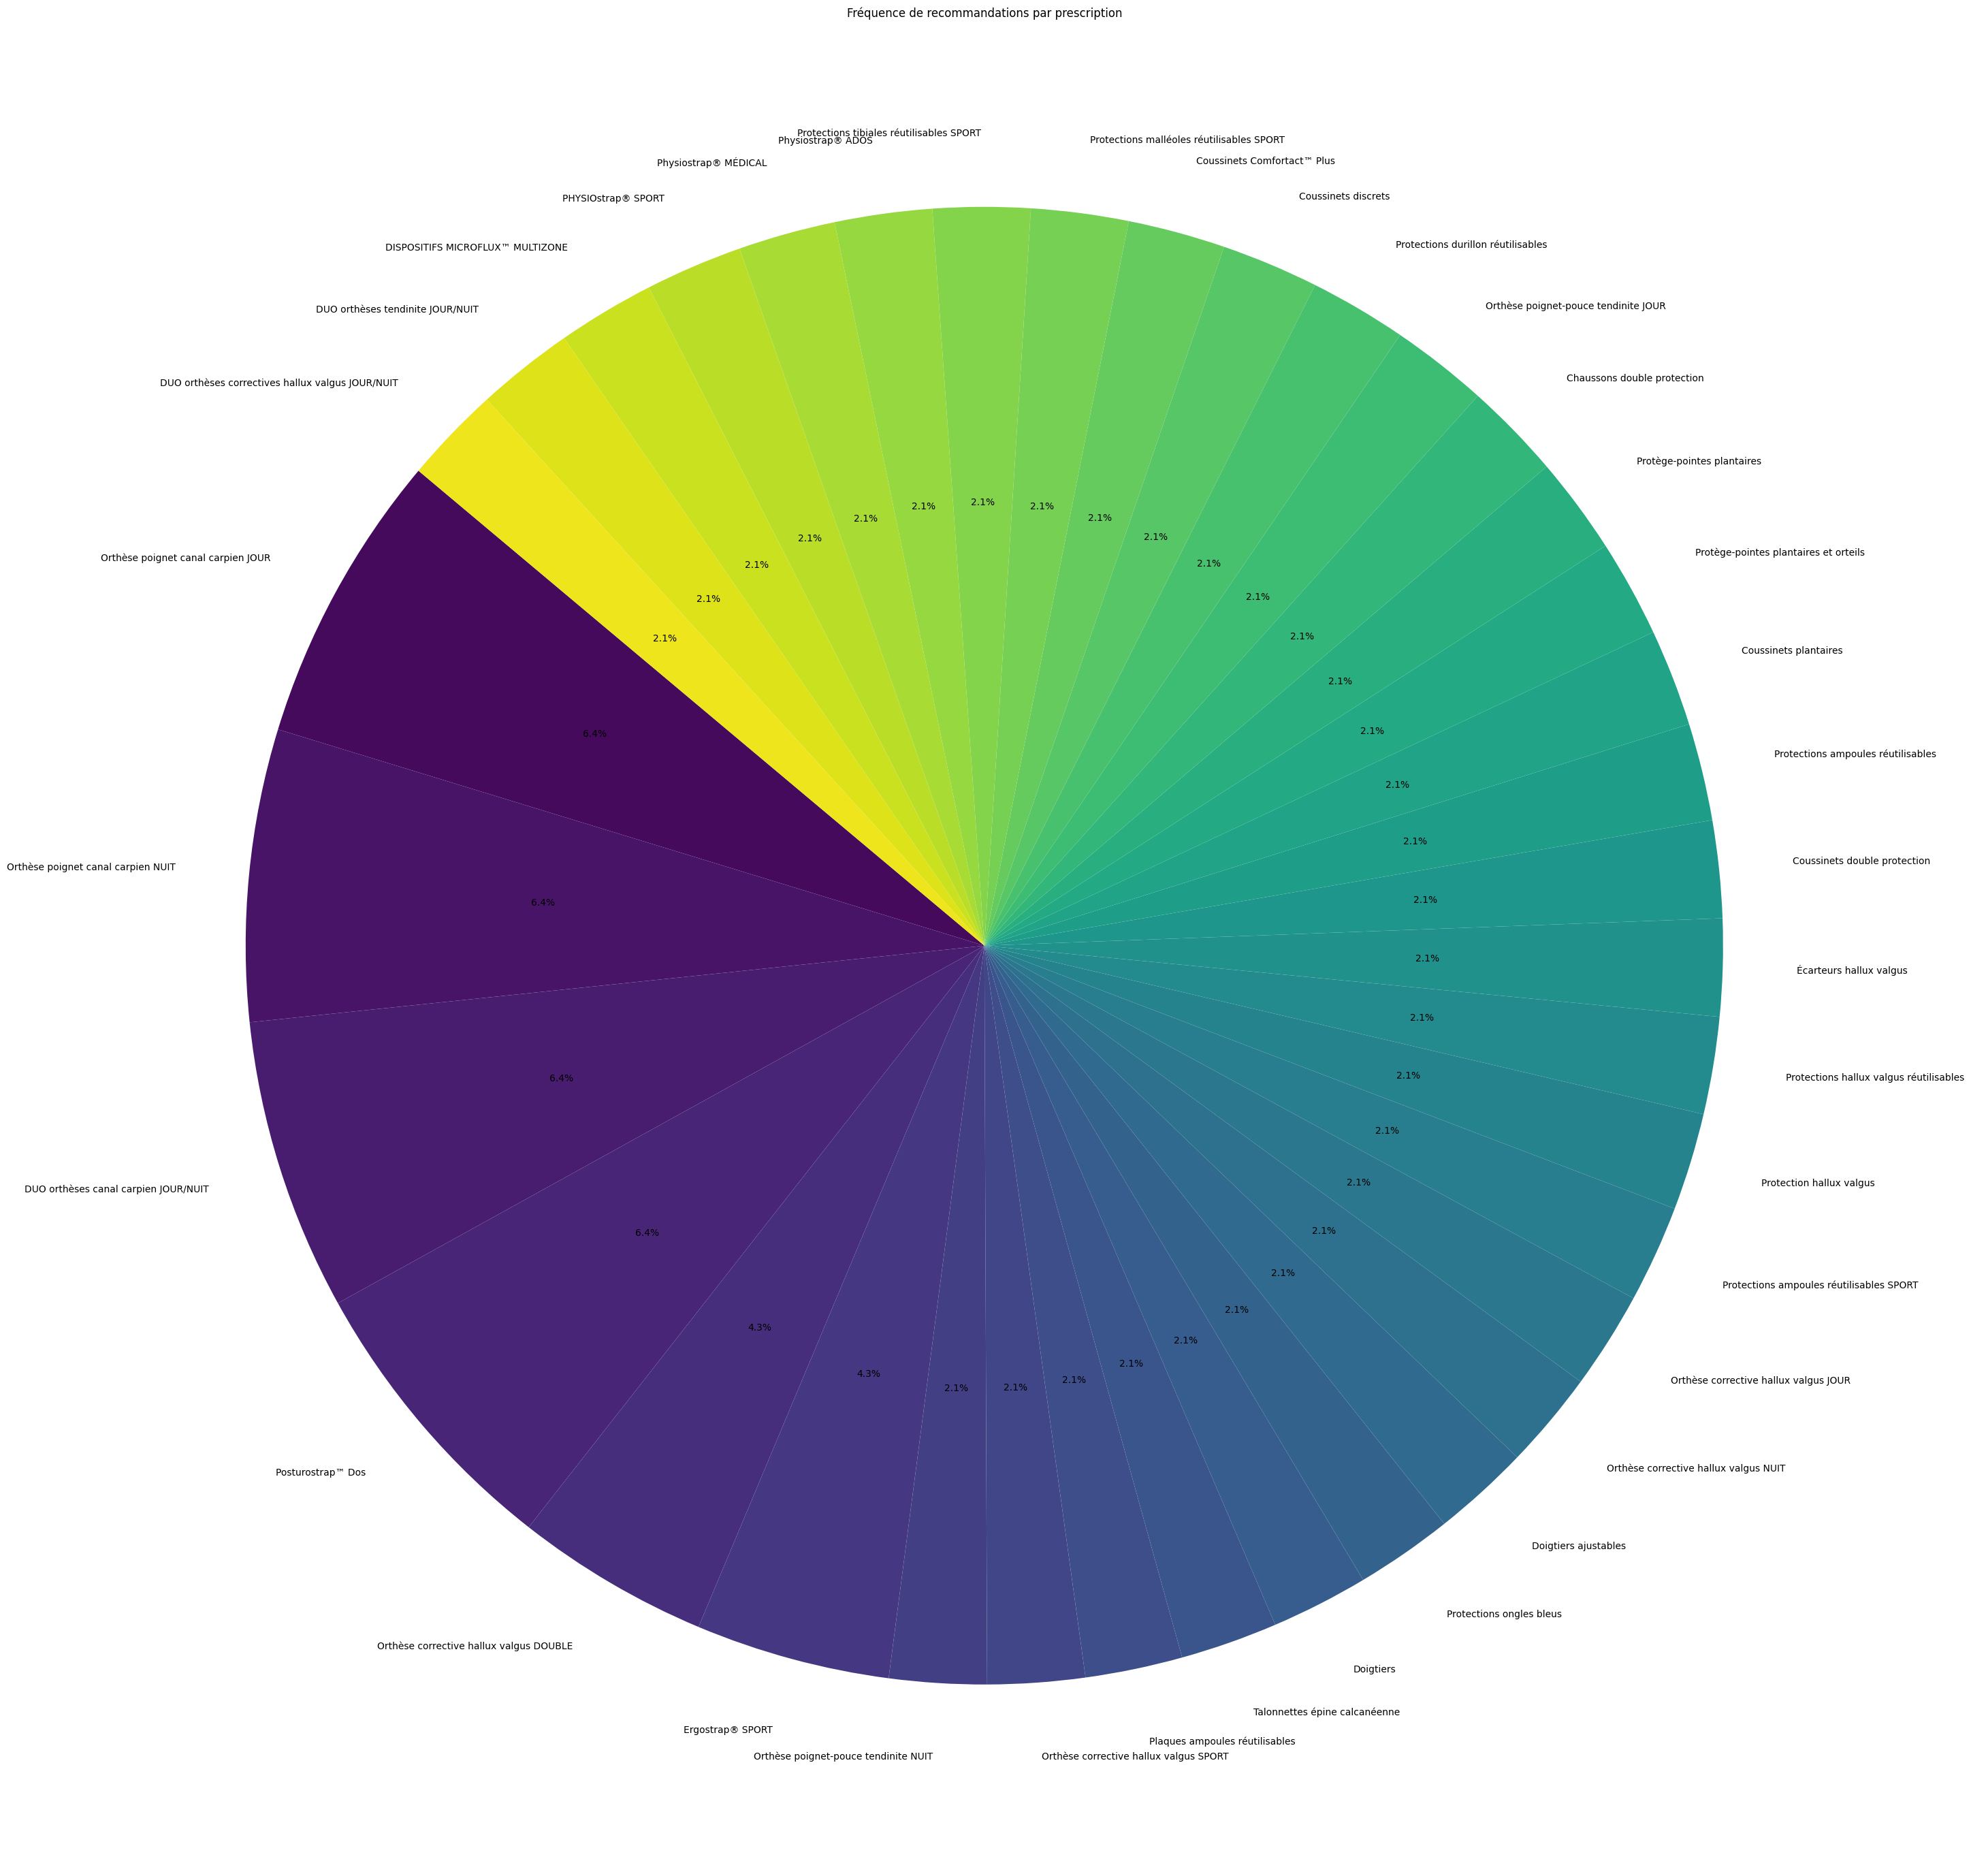

In [11]:
prescription_counts = prescriptions_df['Prescription'].value_counts().reset_index()
prescription_counts.columns = ['Prescription', 'Count']

plt.figure(figsize=(35, 100))
plt.pie(prescription_counts['Count'], labels=prescription_counts['Prescription'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(prescription_counts)))
plt.title('Fréquence de recommandations par prescription')
plt.show()

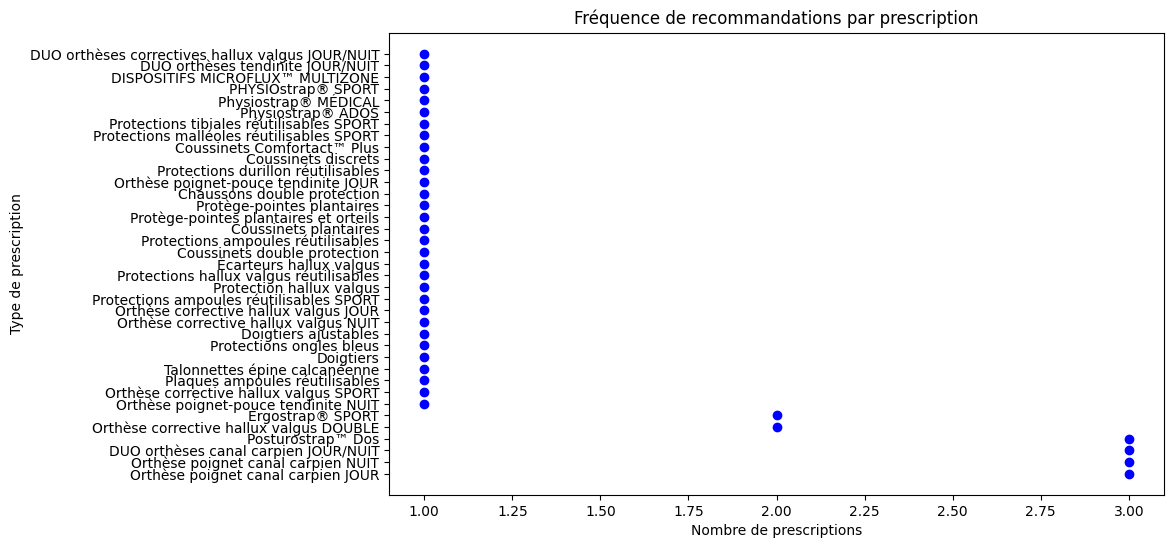

In [12]:
plt.figure(figsize=(10, 6))
prescription_counts = prescriptions_df['Prescription'].value_counts().reset_index()
prescription_counts.columns = ['Prescription', 'Count']
plt.scatter(prescription_counts['Count'], prescription_counts['Prescription'], color='blue')
plt.title('Fréquence de recommandations par prescription')
plt.xlabel('Nombre de prescriptions')
plt.ylabel('Type de prescription')
plt.show()

### **Prix moyen par prescription**


C:\Users\konan\AppData\Local\Temp\ipykernel_9656\583899832.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prescription_avg_price, x='Prix Moyen', y='Prescription', palette="magma")


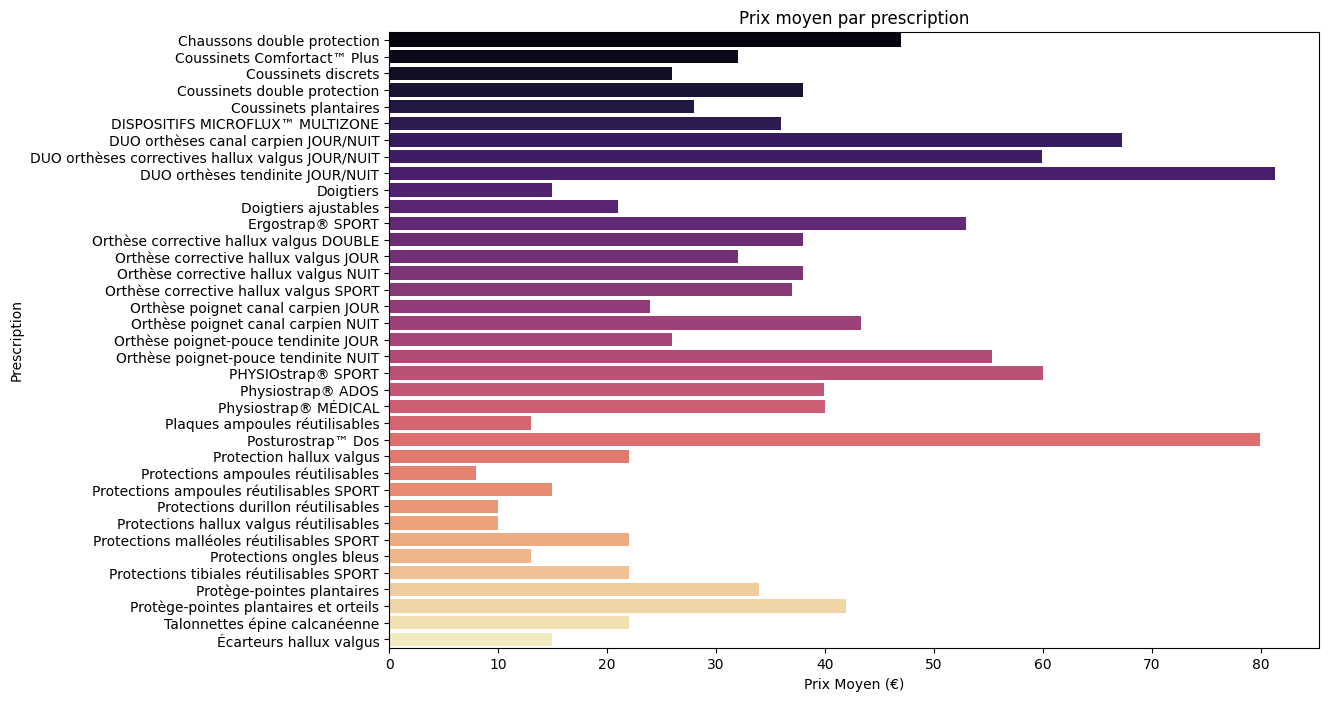

In [13]:
prescriptions_df['Prix'] = pd.to_numeric(prescriptions_df['Prix'], errors='coerce')
prescription_avg_price = prescriptions_df.groupby('Prescription')['Prix'].mean().reset_index()
prescription_avg_price.columns = ['Prescription', 'Prix Moyen']

plt.figure(figsize=(12, 8))
sns.barplot(data=prescription_avg_price, x='Prix Moyen', y='Prescription', palette="magma")
plt.title('Prix moyen par prescription')
plt.xlabel('Prix Moyen (€)')
plt.ylabel('Prescription')
plt.show()


### **Répartition des causes de blessures**


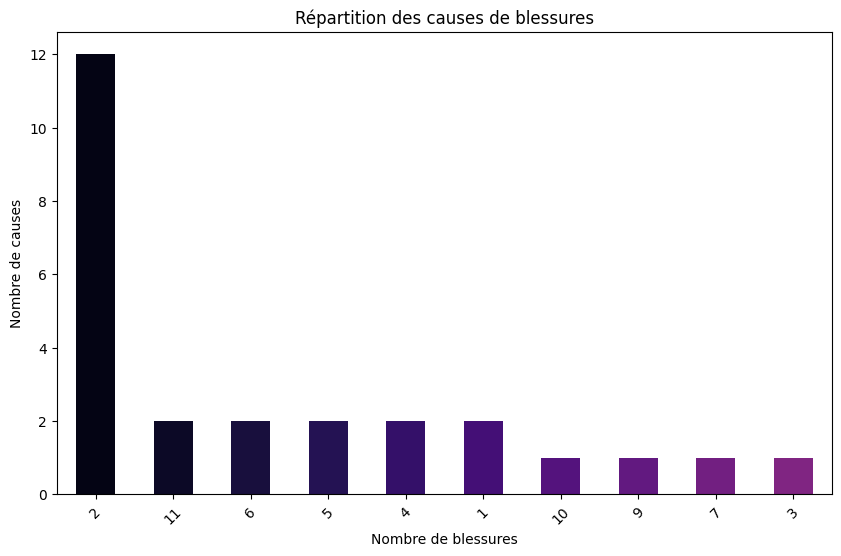

In [14]:
plt.figure(figsize=(10, 6))
non_prescriptions_df['Causes_Blessure'].value_counts().value_counts().plot(kind='bar', color=sns.color_palette("magma", non_prescriptions_df['Causes_Blessure'].nunique()))
plt.title('Répartition des causes de blessures')
plt.xlabel('Nombre de blessures')
plt.ylabel('Nombre de causes')
plt.xticks(rotation=45)
plt.show()

C:\Users\konan\AppData\Local\Temp\ipykernel_9656\3460874772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Causes_Blessure', data=non_prescriptions_df, palette="plasma", order=non_prescriptions_df['Causes_Blessure'].value_counts().index)


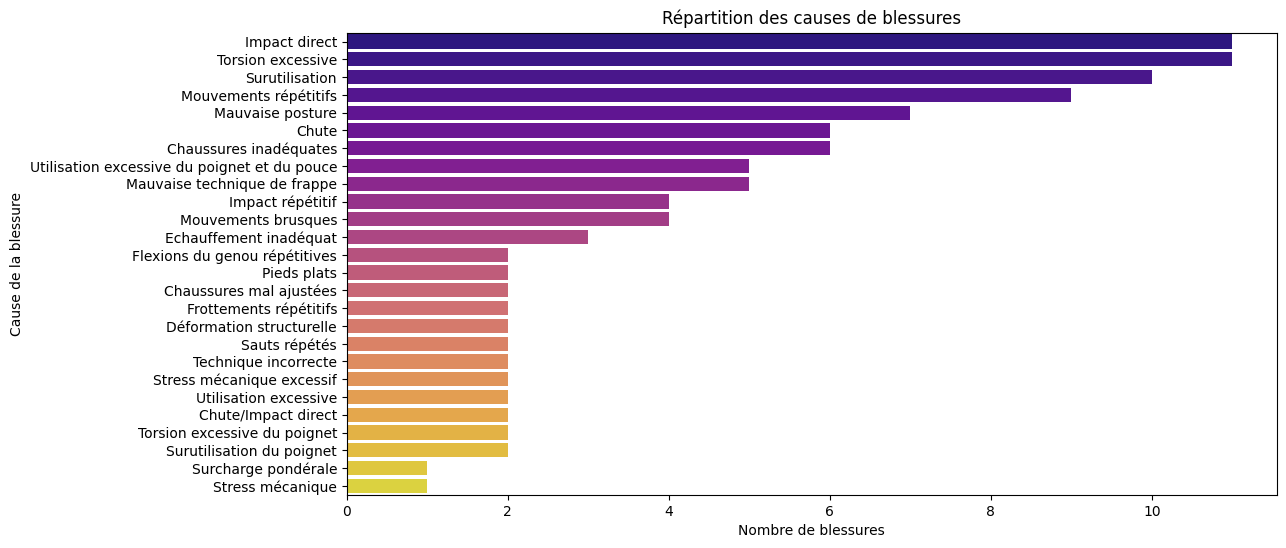

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Causes_Blessure', data=non_prescriptions_df, palette="plasma", order=non_prescriptions_df['Causes_Blessure'].value_counts().index)
plt.title('Répartition des causes de blessures')
plt.xlabel('Nombre de blessures')
plt.ylabel('Cause de la blessure')
plt.show()

### **Répartitions par traitements**

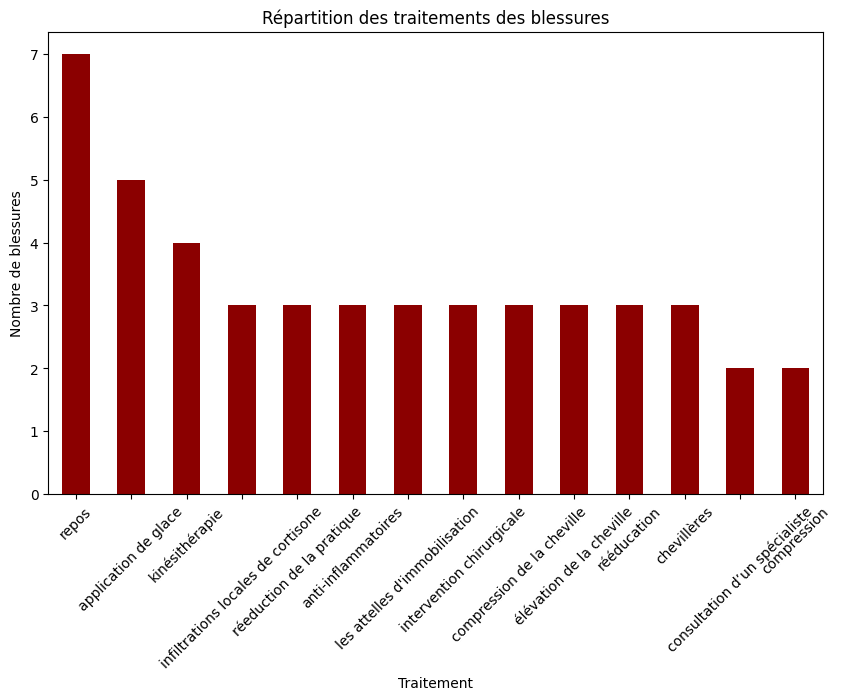

In [16]:
plt.figure(figsize=(10, 6))
non_prescriptions_df['Traitement_Blessures'].value_counts().plot(kind='bar', color='#8B0000')  # Code hexadécimal pour une nuance de rouge foncé
plt.title('Répartition des traitements des blessures')
plt.xlabel('Traitement')
plt.ylabel('Nombre de blessures')
plt.xticks(rotation=45)
plt.show()

### **Répartitions par les zones de blessures sur le terrain**

C:\Users\konan\AppData\Local\Temp\ipykernel_9656\2763470490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Zone_Blessures', data=non_prescriptions_df, palette="tab10", order=non_prescriptions_df['Zone_Blessures'].value_counts().index)


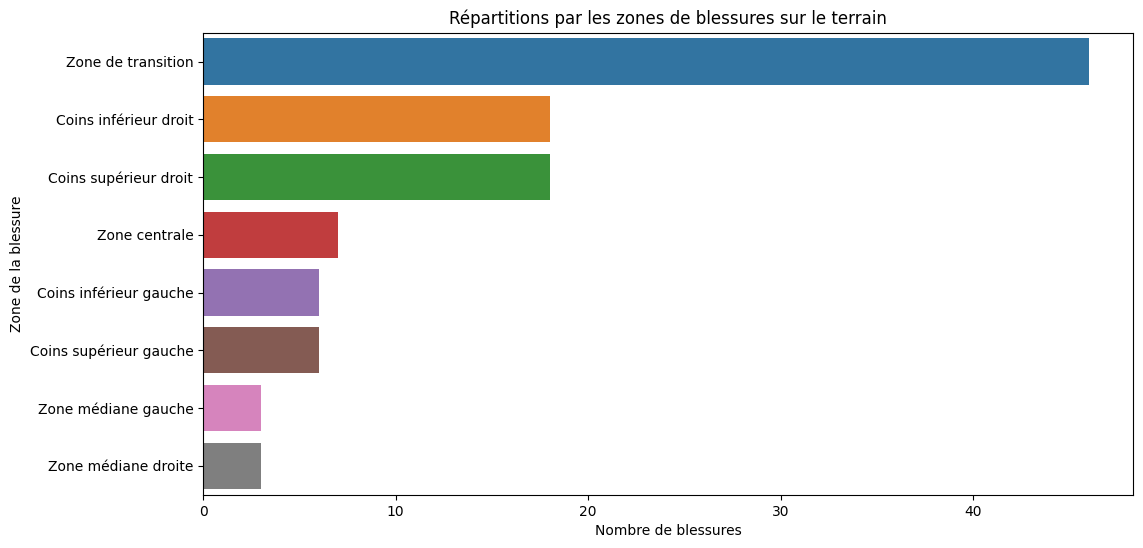

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Zone_Blessures', data=non_prescriptions_df, palette="tab10", order=non_prescriptions_df['Zone_Blessures'].value_counts().index)
plt.title('Répartitions par les zones de blessures sur le terrain')
plt.xlabel('Nombre de blessures')
plt.ylabel('Zone de la blessure')
plt.show()

### **Graphes sur les images de prescriptions médicales**

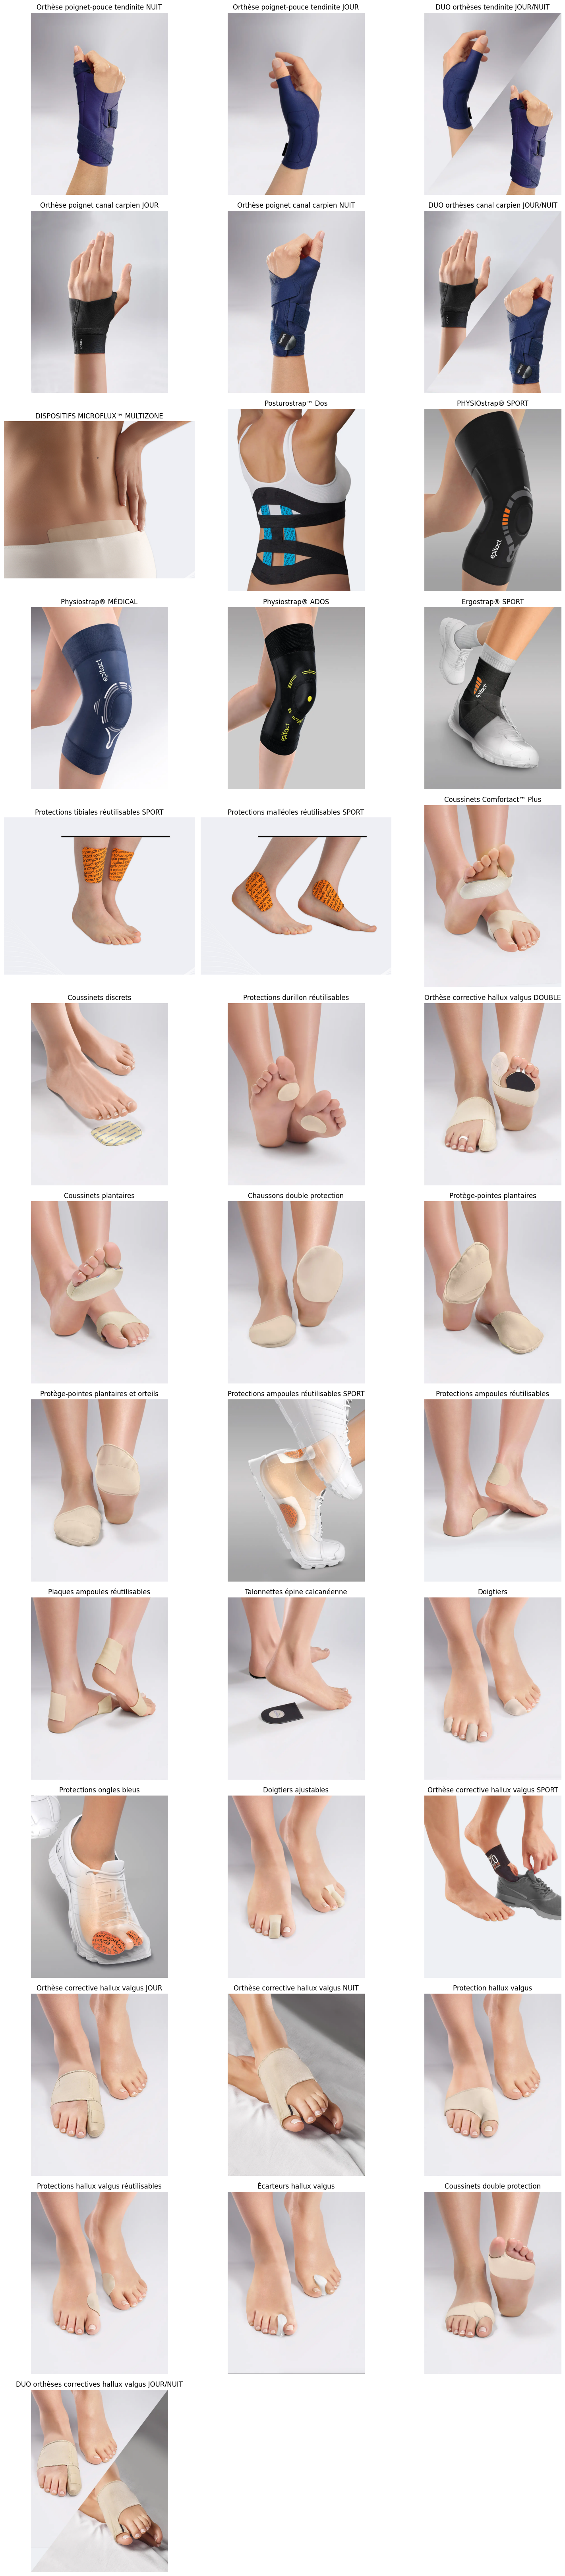

In [18]:
num_images = len(prescriptions_df['Image'].unique())
num_cols = 3
num_rows = (num_images + num_cols - 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))  
added_image_urls = set()

for i, row in prescriptions_df.iterrows():
    prescription = row['Prescription']
    image_url = row['Image']
    normalized_url = image_url.strip().lower()

    if normalized_url in added_image_urls:
        continue  
    else:
        added_image_urls.add(normalized_url)  
    response = requests.get(image_url)
    
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        plt.subplot(num_rows, num_cols, len(added_image_urls))
        plt.imshow(image)
        plt.axis('off')  
        plt.title(prescription) 

plt.tight_layout() 
plt.show()